# Quiz 3 - KD-trees

_5 Questions_

### 1. Which of the following is not true about KD-trees?

* A. It divides the feature space into nested axis-aligned boxes.

* B. It can be used only for approximate nearest neighbor search but not for exact nearest neighbor search.

* C. It prunes parts of the feature space away from consideration by inspecting smallest possible distances that can be achieved.

* D. The query time scales sublinearly with the number of data points and exponentially with the number of dimensions.

* E. It works best in low to medium dimension settings.

B

### Questions 2, 3, 4, and 5 involves training a KD-tree on the following dataset:

                        X1	X2
    Data point 1	-1.58	-2.01
    Data point 2	0.91	3.98
    Data point 3	-0.73	4.00
    Data point 4	-4.22	1.16
    Data point 5	4.19	-2.02
    Data point 6	-0.33	2.15
    
Train a KD-tree by hand as follows:

First split using X1 and then using X2. Alternate between X1 and X2 in order.
Use “middle-of-the-range” heuristic for each split. Take the maximum and minimum of the coordinates of the member points.

Keep subdividing until every leaf node contains two or fewer data points.

1st Split using X1: -0.015
2nd Split using X2: 0.995
3rd Split using X1: -1.945


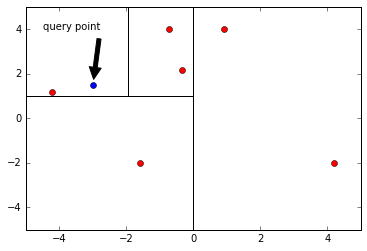

In [76]:
import graphlab as gl
x = gl.SFrame({'x1':[-1.58,0.91,-0.73,-4.22,4.19,-0.33],
             'x2':[-2.01,3.98,4.00,1.16,-2.02,2.15]})

#Split 1
s1 = (abs(max(x['x1']))-abs(min(x['x1'])))/2
print "1st Split using X1:",s1
x1_11 = x[x['x1']<=s1]
x1_12 = x[x['x1']>s1]

#Split 2
s2 = (abs(max(x1_11['x2']))-abs(min(x1_11['x2'])))/2
print "2nd Split using X2:",s2
x2_11 = x1_11[x1_11['x2']<=s2]
x2_12 = x1_11[x1_11['x2']>s2]

#Split 3
s3 = (abs(max(x2_12['x1']))-abs(min(x2_12['x1'])))/2
print "3rd Split using X1:",s3
x1_21 = x2_12[x2_12['x1']<=s3]
x1_22 = x2_12[x2_12['x1']>s3]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x['x1'], x['x2'], 'ro')
plt.plot(-3,1.5, 'bo')
plt.annotate('query point', xy=(-3, 1.5), xytext=(-4.5, 4),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
#Split 1
plt.plot((s1, s1), (-5, 5), 'k-')
#Split 2
plt.plot((-5, s1), (s2, s2), 'k-')
#Split 3
plt.plot((s3, s3), (s2, 5), 'k-')



plt.axis([-5, 5, -5, 5])
plt.show()

### 2. What is the split value used for the first split? Enter the exact value, as you are expected to obtain a finite number of decimals. Use American-style decimals (e.g. 0.026).

-0.015

### 3. What is the split value used for the second split? Enter the exact value, as you are expected to obtain a finite number of decimals. Use American-style decimals (e.g. 0.026).

0.995

### 4. Given a query point (-3, 1.5), which of the data points belong to the same leaf node as the query point? Choose all that apply.

Data point 4

### 5.  Perform backtracking with the query point (-3, 1.5) to perform exact nearest neighbor search. Which of the data points would be pruned from the search? Choose all that apply.

Hint: Assume that each node in the KD-tree remembers the tight bound on the coordinates of its member points, as follows:

<img src="images/image_03_01.png", width=50%, height=50%>

Data point 1, 2, 3, 5, 6

In [77]:
x2_12

x1,x2
-0.73,4.0
-4.22,1.16
-0.33,2.15
